# Validation: Testing effect of leaving out CMs 
This notebook:

* loads a library defined model. 
* loads the data according to the data preprocessor class.
* tests the effect of leaving out CMs on overall CM effectiveness

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
### Initial imports
import logging
import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as T
import matplotlib.pyplot as plt
import arviz as az
import seaborn as sns
import scipy
import copy

logging.basicConfig(level=logging.INFO)
log = logging.getLogger(__name__)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from epimodel.pymc3_models.utils import geom_convolution
from epimodel.pymc3_models import cm_effect
from epimodel.pymc3_models.cm_effect.datapreprocessor import DataPreprocessor

sns.set_style("ticks")
%matplotlib inline

INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Smoothing
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Albania
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Andorra
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Estonia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Iceland
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Latvia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Lithuania
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing New Zealand
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Singapore
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Slovakia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Masking


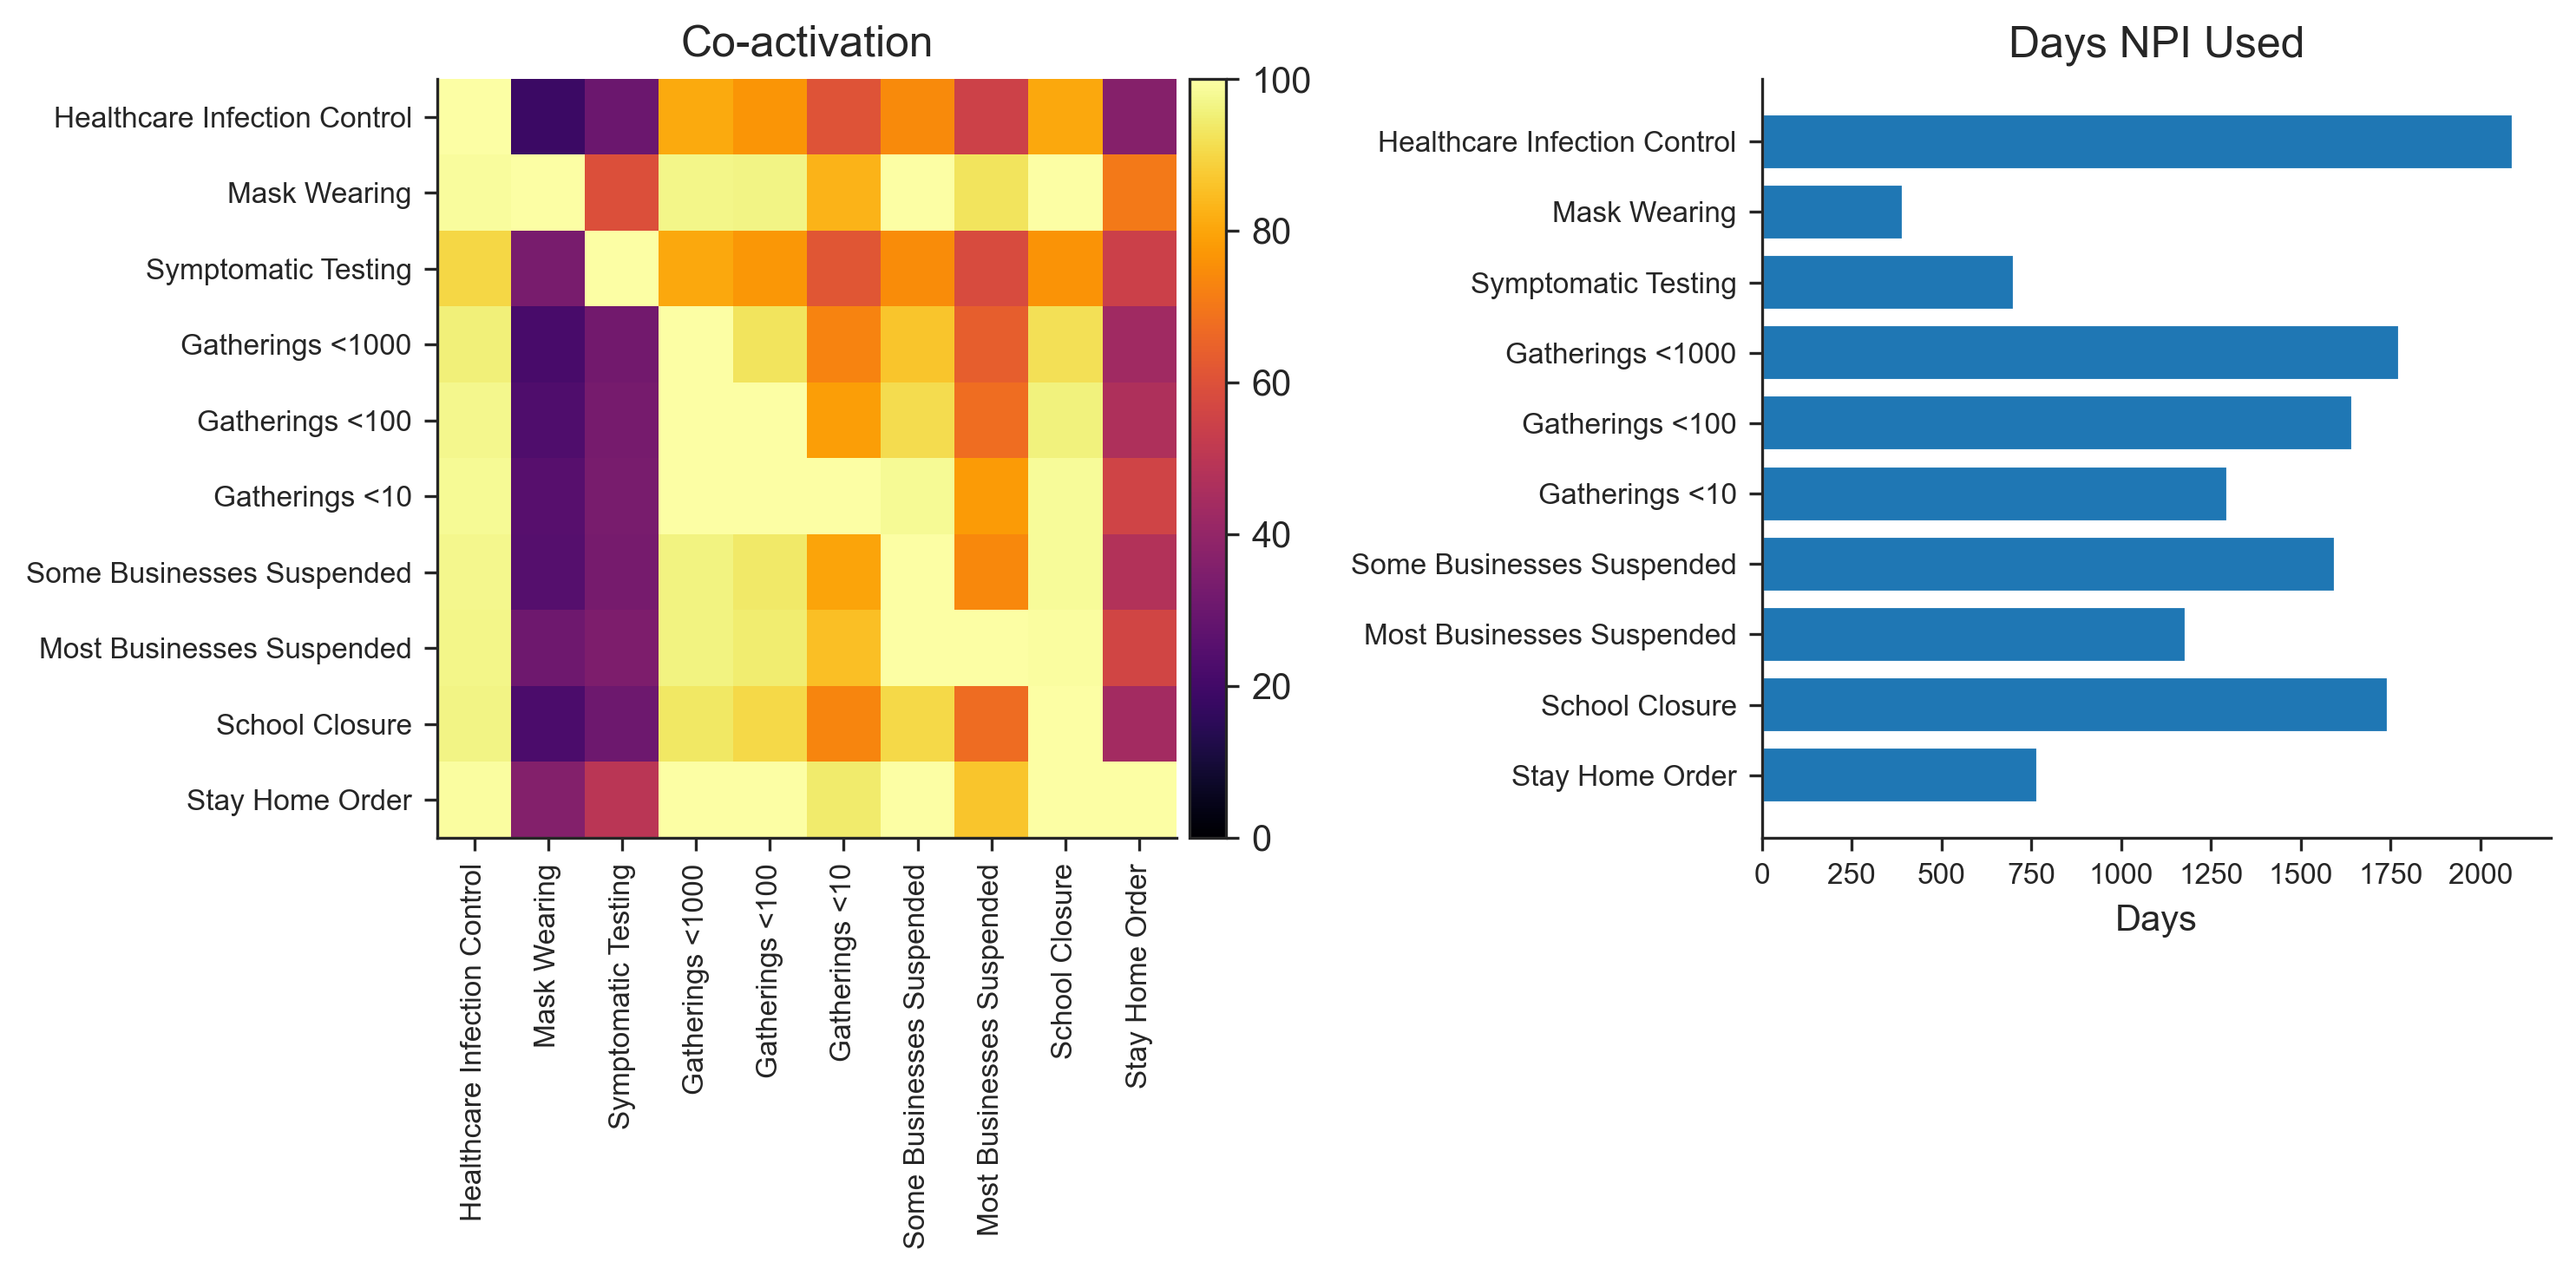

In [3]:
dp = DataPreprocessor()
data = dp.preprocess_data("../final_data/data_final.csv")

In [4]:
cm_leavouts = copy.deepcopy(data.CMs)
cm_leavouts.append('None')
print(data.CMs)
for i in range(len(cm_leavouts)):
    data_cm_leavout = copy.deepcopy(data)
    print('CM left out: ' + cm_leavouts[i])
    if cm_leavouts[i]=='None':
        pass
    else:
        data_cm_leavout.ActiveCMs = np.delete(data_cm_leavout.ActiveCMs, i, 1)
        data_cm_leavout.CMs = np.delete(data_cm_leavout.CMs, i)
    
    with cm_effect.models.CMCombined_Final(data_cm_leavout) as model:
        model.build_model()
    with model.model:
        model.trace = pm.sample(2000, chains=2, target_accept=0.95)
        filename = 'out/cm_leavout_trace_' + str(i) + '.txt'
        cm_trace = model.trace["CMReduction"]
        np.savetxt(filename, cm_trace)

['Healthcare Infection Control', 'Mask Wearing', 'Symptomatic Testing', 'Gatherings <1000', 'Gatherings <100', 'Gatherings <10', 'Some Businesses Suspended', 'Most Businesses Suspended', 'School Closure', 'Stay Home Order']
CM left out: Healthcare Infection Control


Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [InitialSizeDeaths_log, InitialSizeCases_log, GrowthDeaths, GrowthCases, RegionLogR, CM_Alpha]
INFO:pymc3:NUTS: [InitialSizeDeaths_log, InitialSizeCases_log, GrowthDeaths, GrowthCases, RegionLogR, CM_Alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [1:08:48<00:00,  1.21draws/s]


CM left out: Mask Wearing


Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [InitialSizeDeaths_log, InitialSizeCases_log, GrowthDeaths, GrowthCases, RegionLogR, CM_Alpha]
INFO:pymc3:NUTS: [InitialSizeDeaths_log, InitialSizeCases_log, GrowthDeaths, GrowthCases, RegionLogR, CM_Alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [1:07:34<00:00,  1.23draws/s]
The number of effective samples is smaller than 25% for some parameters.
INFO:pymc3:The number of effective samples is smaller than 25% for some parameters.


CM left out: Symptomatic Testing


Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [InitialSizeDeaths_log, InitialSizeCases_log, GrowthDeaths, GrowthCases, RegionLogR, CM_Alpha]
INFO:pymc3:NUTS: [InitialSizeDeaths_log, InitialSizeCases_log, GrowthDeaths, GrowthCases, RegionLogR, CM_Alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [1:07:56<00:00,  1.23draws/s]


CM left out: Gatherings <1000


Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [InitialSizeDeaths_log, InitialSizeCases_log, GrowthDeaths, GrowthCases, RegionLogR, CM_Alpha]
INFO:pymc3:NUTS: [InitialSizeDeaths_log, InitialSizeCases_log, GrowthDeaths, GrowthCases, RegionLogR, CM_Alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [1:07:46<00:00,  1.23draws/s]


CM left out: Gatherings <100


Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [InitialSizeDeaths_log, InitialSizeCases_log, GrowthDeaths, GrowthCases, RegionLogR, CM_Alpha]
INFO:pymc3:NUTS: [InitialSizeDeaths_log, InitialSizeCases_log, GrowthDeaths, GrowthCases, RegionLogR, CM_Alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [1:08:26<00:00,  1.22draws/s]


CM left out: Gatherings <10


Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [InitialSizeDeaths_log, InitialSizeCases_log, GrowthDeaths, GrowthCases, RegionLogR, CM_Alpha]
INFO:pymc3:NUTS: [InitialSizeDeaths_log, InitialSizeCases_log, GrowthDeaths, GrowthCases, RegionLogR, CM_Alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [1:08:51<00:00,  1.21draws/s]


CM left out: Some Businesses Suspended


Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [InitialSizeDeaths_log, InitialSizeCases_log, GrowthDeaths, GrowthCases, RegionLogR, CM_Alpha]
INFO:pymc3:NUTS: [InitialSizeDeaths_log, InitialSizeCases_log, GrowthDeaths, GrowthCases, RegionLogR, CM_Alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [1:09:07<00:00,  1.21draws/s]
The number of effective samples is smaller than 25% for some parameters.
INFO:pymc3:The number of effective samples is smaller than 25% for some parameters.


CM left out: Most Businesses Suspended


Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [InitialSizeDeaths_log, InitialSizeCases_log, GrowthDeaths, GrowthCases, RegionLogR, CM_Alpha]
INFO:pymc3:NUTS: [InitialSizeDeaths_log, InitialSizeCases_log, GrowthDeaths, GrowthCases, RegionLogR, CM_Alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [1:14:01<00:00,  1.13draws/s]


CM left out: School Closure


Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [InitialSizeDeaths_log, InitialSizeCases_log, GrowthDeaths, GrowthCases, RegionLogR, CM_Alpha]
INFO:pymc3:NUTS: [InitialSizeDeaths_log, InitialSizeCases_log, GrowthDeaths, GrowthCases, RegionLogR, CM_Alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [1:21:10<00:00,  1.03draws/s]
The number of effective samples is smaller than 25% for some parameters.
INFO:pymc3:The number of effective samples is smaller than 25% for some parameters.


CM left out: Stay Home Order


Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [InitialSizeDeaths_log, InitialSizeCases_log, GrowthDeaths, GrowthCases, RegionLogR, CM_Alpha]
INFO:pymc3:NUTS: [InitialSizeDeaths_log, InitialSizeCases_log, GrowthDeaths, GrowthCases, RegionLogR, CM_Alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [1:11:23<00:00,  1.17draws/s]
The number of effective samples is smaller than 25% for some parameters.
INFO:pymc3:The number of effective samples is smaller than 25% for some parameters.


CM left out: None


Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (2 chains in 2 jobs)
NUTS: [InitialSizeDeaths_log, InitialSizeCases_log, GrowthDeaths, GrowthCases, RegionLogR, CM_Alpha]
INFO:pymc3:NUTS: [InitialSizeDeaths_log, InitialSizeCases_log, GrowthDeaths, GrowthCases, RegionLogR, CM_Alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [1:10:29<00:00,  1.18draws/s]
The number of effective samples is smaller than 25% for some parameters.
INFO:pymc3:The number of effective samples is smaller than 25% for some parameters.


Healthcare Infection Control
Mask Wearing
Symptomatic Testing
Gatherings <1000
Gatherings <100
Gatherings <10
Some Businesses Suspended
Most Businesses Suspended
School Closure
Stay Home Order


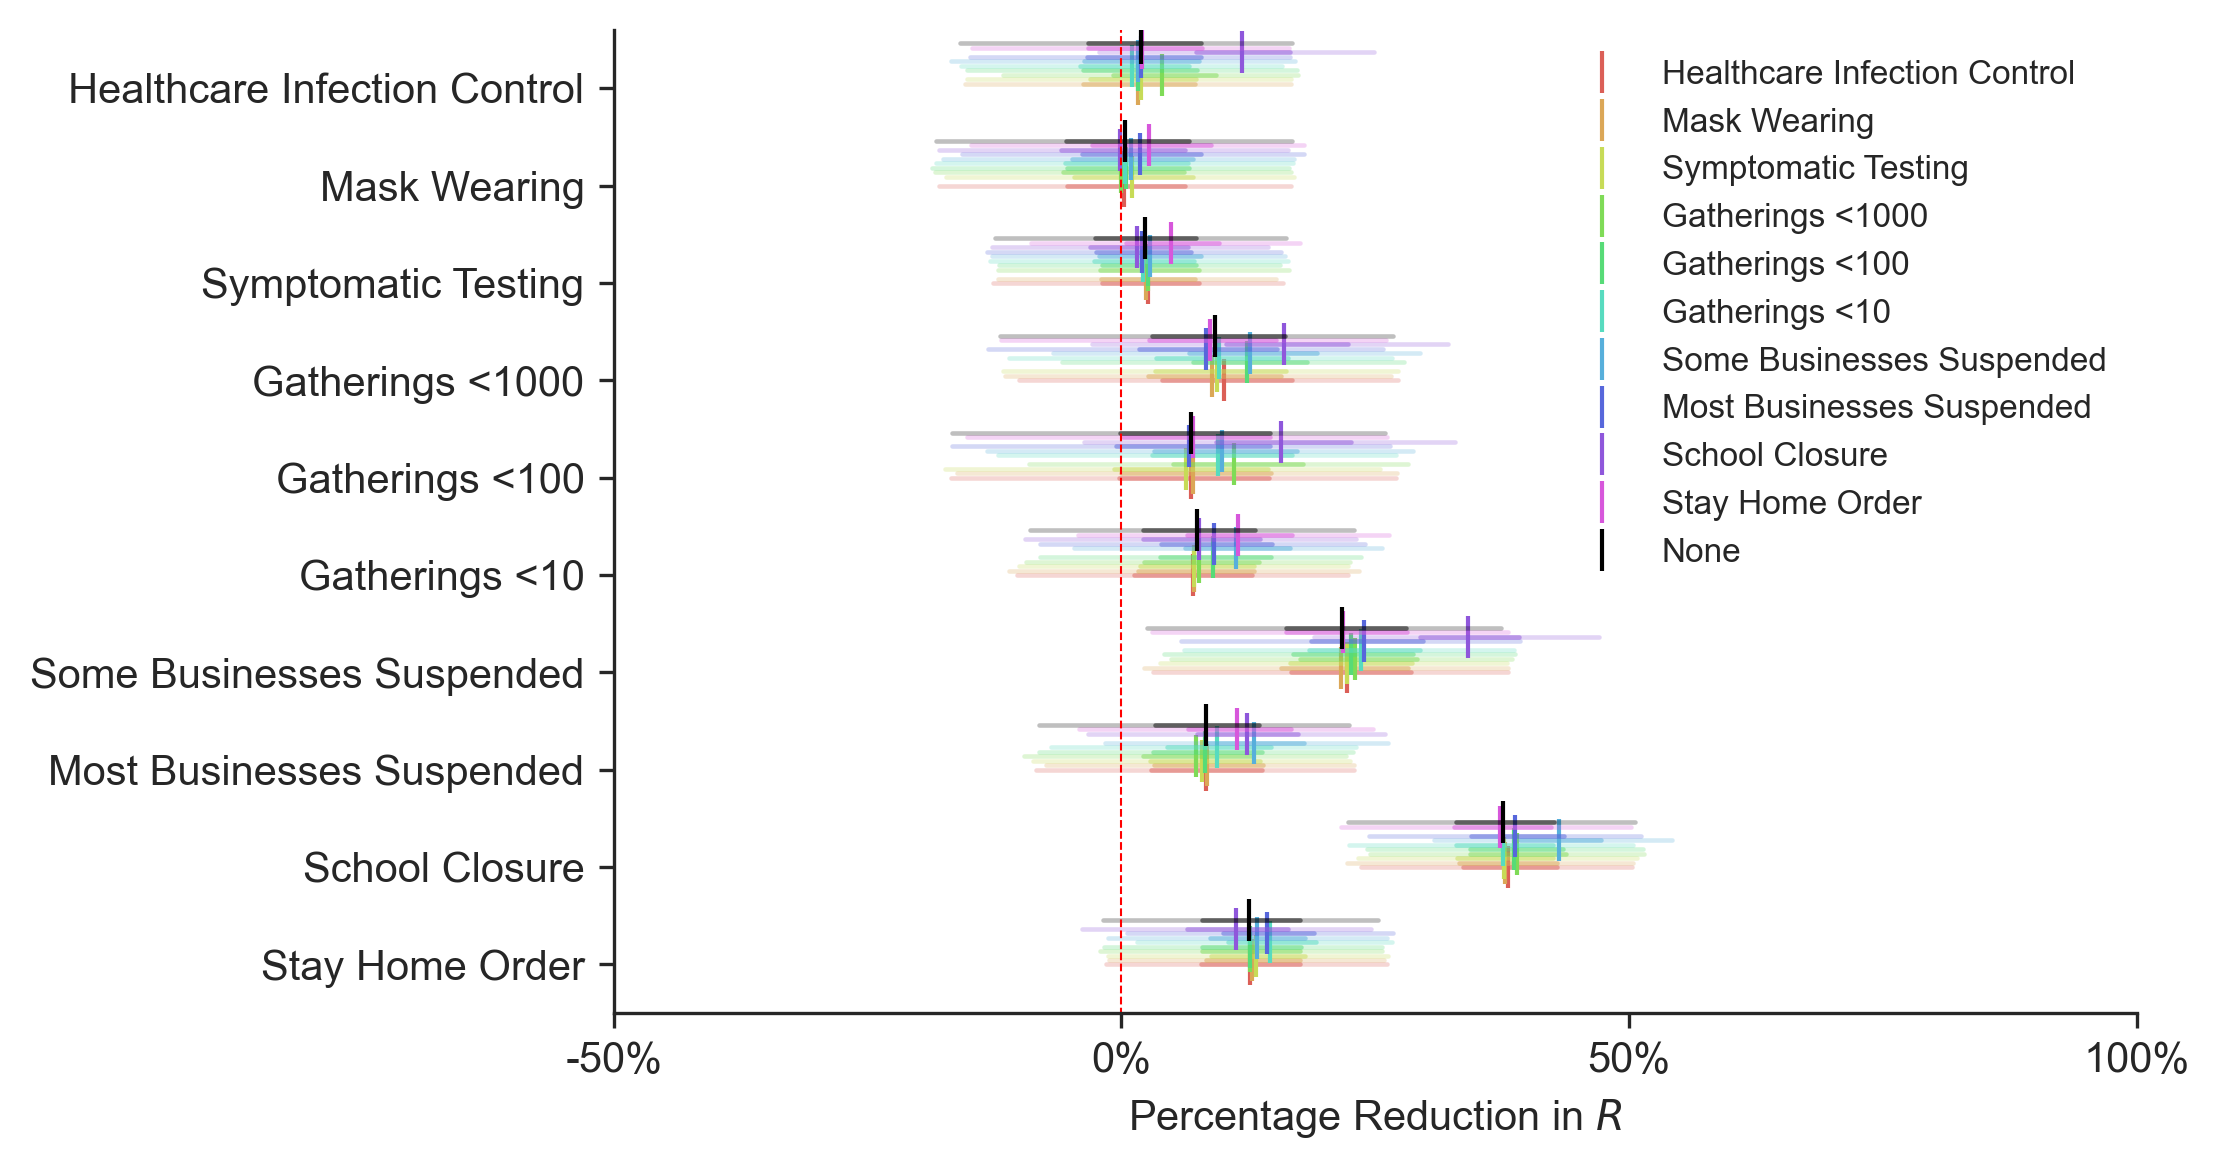

In [58]:
fig = plt.figure(figsize=(7.5, 4), dpi=300)
colors = sns.color_palette("hls",11)
colors[-1] = [0,0,0]
all_features = np.array(data.CMs)
y_offset = 0.06
y_scale = 1.3
for i in range(len(cm_leavouts)):
        filename = 'out/cm_leavout_trace_' + str(i) + '.txt'
        cm_trace = np.loadtxt(filename)
        N_cms = len(all_features)
        
        # calculate means and confidence intervals
        means = 100 * (1 - np.mean(cm_trace, axis=0))
        li = 100 * (1-np.percentile(cm_trace, 2.5, axis=0))
        ui = 100 * (1-np.percentile(cm_trace, 97.5, axis=0))
        lq = 100 * (1-np.percentile(cm_trace, 25, axis=0))
        uq = 100 * (1-np.percentile(cm_trace, 75, axis=0)) 
        
        # add nan to indices of leftout CMs
        if cm_leavouts[i]=='None':
            pass
        else:
            print(cm_leavouts[i])
            ind = np.where(all_features==cm_leavouts[i])[0][0]
            means = np.insert(means, ind, np.nan)
            li = np.insert(li, ind, np.nan)
            ui = np.insert(ui, ind, np.nan)
            lq = np.insert(lq, ind, np.nan)
            uq = np.insert(uq, ind, np.nan)
    
        # plot means and confidence intervals
        y_vals = -1* y_scale * np.arange(len(data.CMs))
        plt.plot(means, y_vals + i*y_offset, marker="|", markersize=10, color=colors[i], 
                 label = cm_leavouts[i],
                 linewidth=0)
        for cm in range(N_cms):
            plt.plot([li[cm], ui[cm]], [y_vals[cm]+i*y_offset, y_vals[cm]+i*y_offset], color=colors[i], 
                     alpha=0.25, linewidth=1.1)
            plt.plot([lq[cm], uq[cm]], [y_vals[cm]+i*y_offset, y_vals[cm]+i*y_offset], color=colors[i], 
                     alpha=0.5, linewidth=1.1)
            
plt.plot([0, 0], [1, -(N_cms)*y_scale], "--r", linewidth=0.5)
xtick_vals = np.arange(-100, 150, 50)
xtick_str = [f"{x:.0f}%" for x in xtick_vals]
plt.yticks(y_vals, np.array(cm_leavouts))
plt.xticks(xtick_vals, xtick_str)
plt.xlim([-50, 100])
#plt.ylim([-(N_cms - 0.5), 0.7])
plt.ylim([y_vals[-1]-y_scale/2, y_vals[0]+y_scale*.6])
plt.xlabel("Percentage Reduction in $R$")
plt.legend(frameon=False, fontsize=8, loc = 'upper right')
plt.rc('font', size=10)
sns.despine()
plt.tight_layout()
plt.savefig('out/cm_leavout_sensitivity.pdf')